In [2]:
import requests
import pandas as pd

# Define the API endpoint and parameters
url = "https://api.fda.gov/food/enforcement.json?search=report_date:[20200101+TO+20240804]&limit=500"

# Send a GET request to the API
response = requests.get(url)


# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
    
    # Extract the list of results (recalls)
    recalls = data.get('results', [])
    
    # Create a DataFrame from the list of recall records
    recall_df = pd.DataFrame(recalls)
    
    # Save the DataFrame to a CSV file
    recall_df.to_csv('fda_food_enforcement_data.csv', index=False)

In [3]:
clean_df = recall_df.rename(columns={"status": "Status", 
                                     "city": "City",
                                     "state": "State",
                                     "country":"Country",
                                     "classification":"Classification",
                                     "openfda":"Open FDA",
                                     "product_type":"Product Type",
                                     "event_id":"Event ID",
                                     "recalling_firm":"Recalling Firm",
                                     "address_1":"Address 1",
                                     "address_2":"Address 2",
                                     "postal_code":"Postal Code",
                                     "voluntary_mandated":"Voluntary Mandated",
                                     "initial_firm_notification":"Initial Firm Notification",
                                     "distribution_pattern":"Distribution Pattern",
                                     "recall_number":"Recall Number",
                                     "product_description":"Product Description",
                                     "product_quantity":"Product Quantity",
                                     "reason_for_recall":"Reason for Recall",
                                     "recall_initiation_date":"Recall Initiation Date",
                                     "center_classification_date":"Center Classification Date",
                                     "termination_date":"Termination Date",
                                     "report_date":"Report Date",
                                     "code_info":"Code Info",
                                     "more_code_info":"More Code Info",
                                    
                                     })

clean_df

,Status,City,State,Country,Classification,Open FDA,Product Type,Event ID,Recalling Firm,Address 1,...,Recall Number,Product Description,Product Quantity,Reason for Recall,Recall Initiation Date,Center Classification Date,Termination Date,Report Date,Code Info,More Code Info
0,Terminated,Rancho Dominguez,CA,United States,Class III,{},Food,85253,"Organic By Nature, Inc.",2610 Homestead Pl,...,F-0904-2020,Pure Planet Organic Parasite Cleanse; Net Wt....,xx,Firm was notified by supplier that Organic Gro...,20200224,20200413,20210202,20200401,Lot codes: 72746,
1,Terminated,Brooklyn,NY,United States,Class III,{},Food,85364,Rong Shing Trading NY Inc,47 Bridgewater St # 57,...,F-0921-2020,"XinXing Dried Plum, Net Wt. 5.3 oz.(150g)",unknown,"Product contains dried peaches, but front labe...",20200401,20200424,20210318,20200506,UPC CODE: 6868978724496 BEST BEFORE: 11/15/2021,NaN
2,Terminated,Monterey,CA,United States,Class I,{},Food,89381,Dole Fresh Vegetables Inc,2959 Salinas Hwy,...,F-0757-2022,Marketside 12oz Classic Salad UPC:6-81131-328...,,Harvest equipment used in harvesting raw icebe...,20220106,20220222,20220322,20220302,Product codes beginning with B - Best by Dates...,
3,Terminated,Lovell,WY,United States,Class II,{},Food,90158,"Queen Bee Gardens, LLC",262 E Main St,...,F-1472-2022,Honey Caramels Blue Raspberry. Product availab...,171 pieces,Products may potentially contain one or more o...,20220428,20220719,20230117,20220727,None,NaN
4,Terminated,Nof Ha-Galil,,Israel,Class I,{},Food,90105,ELITE CONFECTIONERY LTD,Nazareth-Ilit,...,F-1233-2022,ELITE MILK CHOCOLATE COATED RICE CAKES UPC:81...,unknown,Potential contamination with Salmonella,20220428,20220604,20221103,20220615,All lots,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Ongoing,Salinas,CA,United States,Class I,{},Food,92684,Braga Fresh Foods,121 Spreckels Blvd Bldg 10,...,F-1293-2023,365 by Whole Foods Market Organic Asian Inspir...,673 cases,Undeclared milk and egg,20230710,20230725,NaN,20230726,Lot code - BFFS179A2 Best if Used By: 7/16/2023,
496,Terminated,Bharuch,,India,Class I,{},Food,92067,JABSONS FOODS PRIVATE LIMITED (Formerly Known ...,"A-2, Bholav Udhyog Nagar",...,F-0817-2023,Tandoori Kaju- Cashew Nuts; Net. Wt 3.53 oz L...,187 cases,Undeclared Milk,20230319,20230504,20230804,20230510,"UPC Code 8904067711577 Lot # US4-09, US4-08,US...",
497,Completed,East Arlington,VT,United States,Class I,{},Food,93452,WILCOX ICE CREAM,116 Sweet St,...,F-0538-2024,"Wilcox Premium Maple Walnut in 1.5QT, Quart, P...",19.31 Tons Total,Products may be contaminated with Listeria mon...,20231115,20231208,NaN,20231220,Best By/Sell By dates of 9/14/24 to 11/14/24,NaN
498,Terminated,Inver Grove Heights,MN,United States,Class I,{},Food,93516,"Cut Fruit Express, Inc.",11585 Courthouse Blvd,...,F-0583-2024,"Mixed Fruit Products that contain Cantaloupe, ...",123 units,Cantaloupe containing products may be contamin...,20231124,20231213,20240111,20231220,1. 11/5/23 2. 11/5/23 3. 11/4/23 4. 11/4/...,NaN


In [ ]:
#Time it takes to close a recall - Manuel

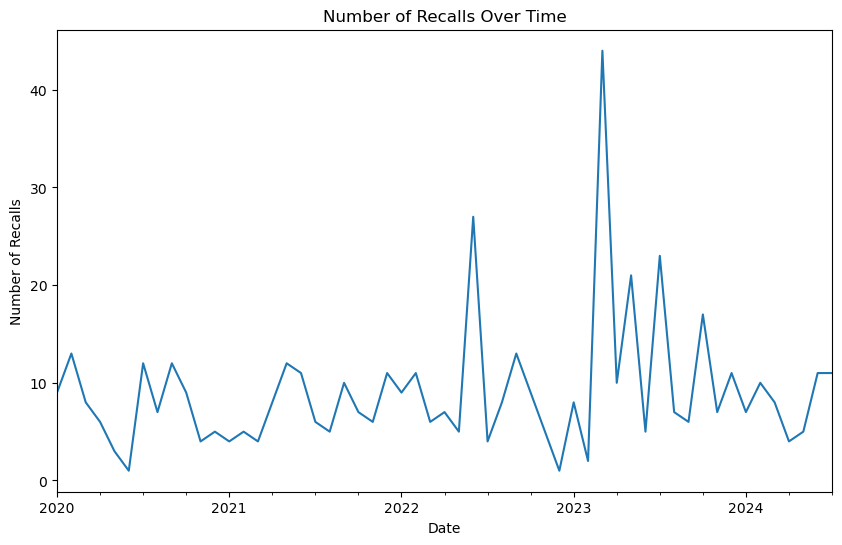

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('fda_food_enforcement_data.csv')

# Convert report_date to datetime format
df['report_date'] = pd.to_datetime(df['report_date'], format='%Y%m%d')

# Group by year and month, then count the number of recalls
recall_trends = df.groupby(df['report_date'].dt.to_period('M')).size()

# Plot the recall trends over time
recall_trends.plot(kind='line', figsize=(10, 6), title='Number of Recalls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Recalls')
plt.show()

In [40]:
# Load the dataset
df = pd.read_csv('fda_food_enforcement_data.csv')

# Convert report_date to datetime format
df['report_date'] = pd.to_datetime(df['report_date'], format='%Y%m%d')

# Group by year and classification, then count the number of recalls
recall_trends_yearly = df.groupby([df['report_date'].dt.year, 'classification']).size().unstack(fill_value=0)
recall_trends_yearly

classification,Class I,Class II,Class III
report_date,,,
2020,29,52,8
2021,30,58,1
2022,62,40,3
2023,90,60,11
2024,18,36,2


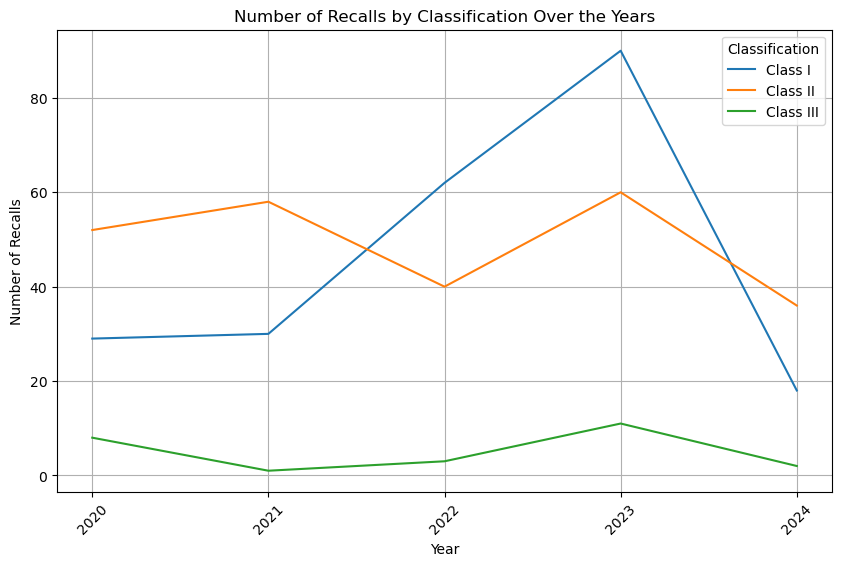

In [39]:
# Load the dataset
df = pd.read_csv('fda_food_enforcement_data.csv')

# Convert report_date to datetime format
df['report_date'] = pd.to_datetime(df['report_date'], format='%Y%m%d')

# Group by year and classification, then count the number of recalls
recall_trends_yearly = df.groupby([df['report_date'].dt.year, 'classification']).size().unstack(fill_value=0)

# Plot the recall trends over the years with different lines for each classification
plt.figure(figsize=(10, 6))
for classification in recall_trends_yearly.columns:
    plt.plot(recall_trends_yearly.index, recall_trends_yearly[classification], label=classification)

plt.title('Number of Recalls by Classification Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.xticks(recall_trends_yearly.index, rotation=45)
plt.legend(title='Classification')
plt.grid(True)
plt.show()

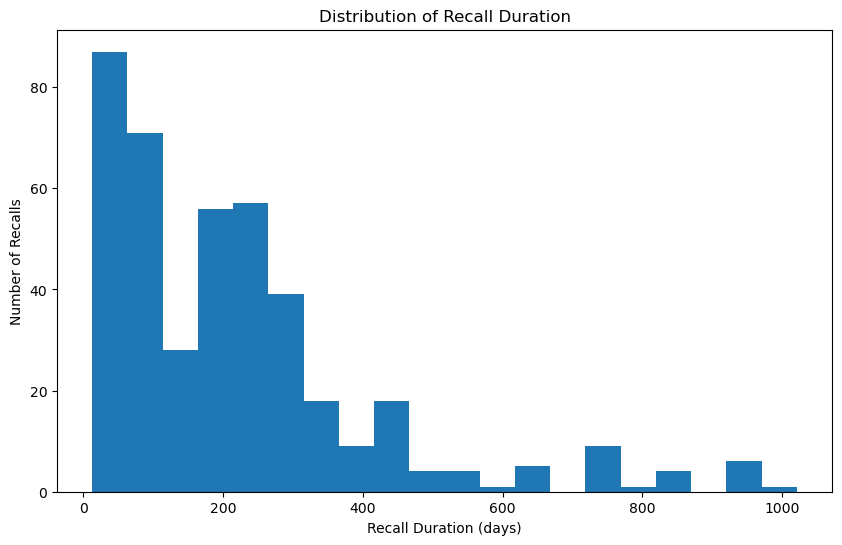

In [23]:
df['recall_initiation_date'] = pd.to_datetime(df['recall_initiation_date'], format='%Y%m%d')
df['termination_date'] = pd.to_datetime(df['termination_date'], format='%Y%m%d')

# Calculate the duration of each recall
df['recall_duration'] = (df['termination_date'] - df['recall_initiation_date']).dt.days

# Plot the distribution of recall durations
df['recall_duration'].plot(kind='hist', bins=20, figsize=(10, 6), title='Distribution of Recall Duration')
plt.xlabel('Recall Duration (days)')
plt.ylabel('Number of Recalls')
plt.show()

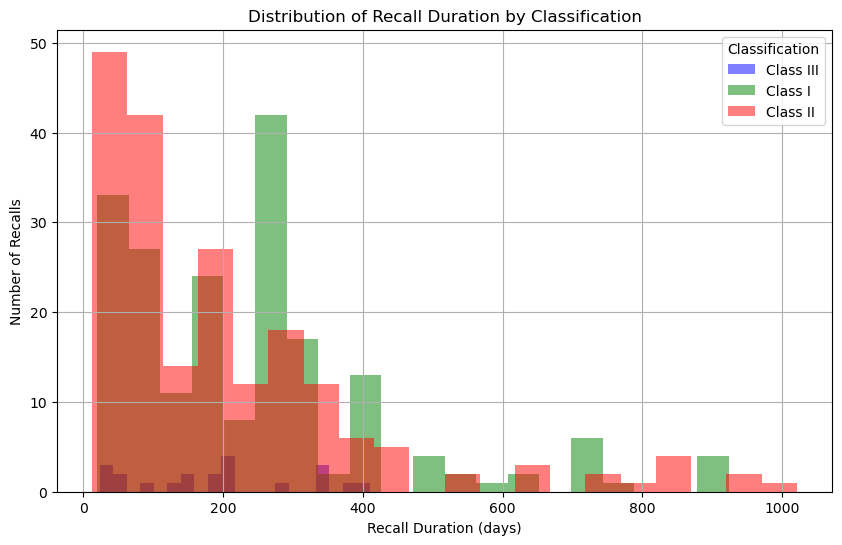

In [24]:
df['recall_initiation_date'] = pd.to_datetime(df['recall_initiation_date'], format='%Y%m%d')
df['termination_date'] = pd.to_datetime(df['termination_date'], format='%Y%m%d')

# Calculate the duration of each recall
df['recall_duration'] = (df['termination_date'] - df['recall_initiation_date']).dt.days

# Plot the distribution of recall durations by classification
plt.figure(figsize=(10, 6))

# Plot each classification with a different color
for classification, color in zip(df['classification'].unique(), ['blue', 'green', 'red']):
    subset = df[df['classification'] == classification]
    plt.hist(subset['recall_duration'].dropna(), bins=20, alpha=0.5, color=color, label=classification)

# Adding labels and title
plt.title('Distribution of Recall Duration by Classification')
plt.xlabel('Recall Duration (days)')
plt.ylabel('Number of Recalls')
plt.legend(title='Classification')
plt.grid(True)
plt.show()

In [34]:
listeria_recalls = df[df['reason_for_recall'].str.contains('Listeria', case=False, na=False)]

# Count the number of recalls that mention 'Listeria'
listeria_count = listeria_recalls.shape[0]
listeria_count

106

In [36]:
listeria_recalls

,status,city,state,country,classification,openfda,product_type,event_id,recalling_firm,address_1,...,product_description,product_quantity,reason_for_recall,recall_initiation_date,center_classification_date,termination_date,report_date,code_info,more_code_info,recall_duration
2,Terminated,Monterey,CA,United States,Class I,{},Food,89381,Dole Fresh Vegetables Inc,2959 Salinas Hwy,...,Marketside 12oz Classic Salad UPC:6-81131-328...,NaN,Harvest equipment used in harvesting raw icebe...,2022-01-06,20220222,2022-03-22,2022-03-02,Product codes beginning with B - Best by Dates...,NaN,75.0
11,Terminated,Chicopee,MA,United States,Class I,{},Food,84751,Rachael's Food Corporation,705 Meadow St,...,Rachael's brand and Big Y brand Protein Snack ...,NaN,Product may be contaminated with Listeria mono...,2019-12-31,20200204,2020-03-25,2020-02-12,"Production Dates: Dec 27, Dec 29, Dec 30, Jan ...",NaN,85.0
13,Terminated,Baltimore,MD,United States,Class I,{},Food,91653,"FRESH IDEATION FOOD GROUP, LLC dba Fresh Creat...",2800 Wegworth Ln,...,"Bistro To Go, Gourmet Cheese & Fruit Plate, Ne...",NaN,"On 02/03/2023, FRESH IDEATION FOOD GROUP, LLC ...",2023-02-03,20231017,2023-10-17,2023-03-22,UPC Code : 813141021144,NaN,256.0
17,Terminated,Caledonia,MI,United States,Class I,{},Food,92065,Caledonia Facility of Revolution Farms LLC,2901 76th St Se,...,Revolution Farms Zesty Southwest 6oz salad kit...,66.0,Listeria monocytogenes,2023-04-05,20230506,2023-05-09,2023-05-17,Sell By 3/23/23,NaN,34.0
29,Terminated,Coral Gables,FL,United States,Class II,{},Food,94530,"CN Frozen Foods, INC",2330 Ponce De Leon Blvd,...,Sysco Classic Riced Cauliflower packed in a 4l...,NaN,Riced Cauliflower tested positive for Listeria...,2024-04-27,20240515,2024-06-24,2024-05-22,Manufacture #: 30.05.2023 Best Buy Date: 05/2...,NaN,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Terminated,Baltimore,MD,United States,Class I,{},Food,91653,"FRESH IDEATION FOOD GROUP, LLC dba Fresh Creat...",2800 Wegworth Ln,...,"Fresh Creative Cuisine White Label, Mango Haba...",90.0,"On 02/03/2023, FRESH IDEATION FOOD GROUP, LLC ...",2023-02-03,20231017,2023-10-17,2023-03-22,UPC Code : 813141022356,NaN,256.0
488,Terminated,City Of Industry,CA,United States,Class I,{},Food,88016,Marquis Worldwide Specialty Inc,883 S Azusa Ave,...,Conah Organic Enoki Mushrooms; 200 g (7.05 oz...,NaN,California Department of Public Health sampled...,2021-05-28,20210629,2021-07-23,2021-07-07,No codes on product,NaN,56.0
489,Terminated,Cleveland,OH,United States,Class I,{},Food,93644,"Herold Salads, Inc.",17512 Miles Ave,...,Herold's Salad - Shell Macaroni Salad packaged...,NaN,Potential contamination with Listeria monocyto...,2023-12-07,20240117,2024-02-28,2024-01-24,"Code 8 Expiration: 12/4/2023, 12/11/2023, 12/...",NaN,83.0
491,Terminated,Streamwood,IL,United States,Class I,{},Food,89269,Fresh Express Inc (Div of Chiquita Brands),1109 E Lake St,...,"""Asian Avocado"" (salad product) packed in 9.7o...",NaN,potential to be contaminated with Listeria mon...,2021-12-18,20220122,2023-05-17,2022-02-02,Z324-Z350,NaN,515.0


In [35]:
salmonella_recalls = df[df['reason_for_recall'].str.contains('Salmonella', case=False, na=False)]

salmonella_count = salmonella_recalls.shape[0]
salmonella_count

78